# Some simple tests to ensure smooth functioning of the code

In [11]:
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import tensorflow as tf
import elvet
import matplotlib.pyplot as plt
#import pandas as pd

from model import model
from fitted_functions import fitted_JB, fitted_JF
from auxiliary import sqrt_new, reg_sq_root

### Defining a dictionary of parameters and initializing model

In [37]:
def sqrt_new(x):
    return (tf.exp(5 * x) - tf.exp(5 * 1e-8) - tf.sqrt(1e-8) ) * tf.exp(-30000*(x - 1e-8)**2 )


def reg_sq_root(x1):
    x = tf.cast(x1, tf.float32)
    return tf.where(tf.math.less(x, 1e-8), sqrt_new(x), tf.sqrt(x))

In [38]:
reg_sq_root(0.0)

<tf.Tensor: shape=(), dtype=float32, numpy=-1e-04>

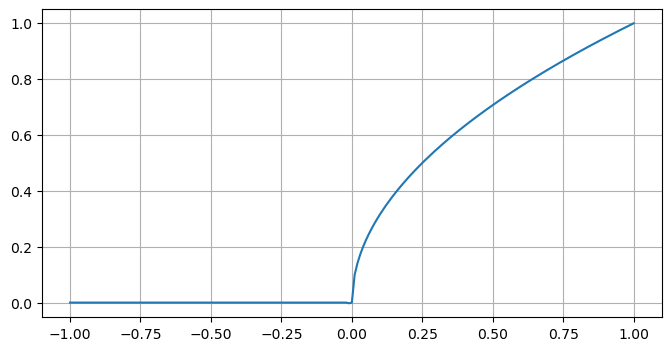

In [45]:
x2 = np.linspace(-1,1,201)
x = tf.cast(x2, tf.float32)

plt.figure(figsize=(8,4))

# plt.subplot(1,2,1)
# plt.plot(x, sqrt_new(x))

# plt.subplot(1,2,2)
plt.plot(x, reg_sq_root(x))
plt.grid(True)

In [46]:
test_params1 = {'g1': 0.4632, 'g2': 0.6485, 'yt': 0.92849, 'yb': 0.0167, 'mHsq': 0.286270859792, 'mSsq': 4.4819542, 'lmbd': -0.6888422590446, 'lmbd_SH': 10.90, 'lmbd_S': 1, 'N': 0.5, 'vevh': 3.08204}

test_model1 = model(test_params1, bsm = True, eft = False)

In [47]:
test_params2 = {'g1': 0.4632, 'g2': 0.6485, 'yt': 0.92849, 'yb': 0.0167, 'mHsq': -1.19109375, 'mSsq': 0.0625, 'lmbd': 0.2582, 'lmbd_SH': 0.85, 'lmbd_S': 1, 'N': 4, 'vevh': 3.08204}

test_model2 = model(test_params2, bsm = True, eft = False)

In [48]:
for i in range(len(test_model1.field_object_list)):
    print(test_model1.field_object_list[i].name)

sm_higgs
goldstone
bsm_scalar
w_boson_t
w_boson_l
z_boson_t
z_boson_l
photon_l
t_quark
b_quark


### Calling higgs and goldstone masses as functions of $(h, T)$ and plotting

In [68]:
hy = elvet.box((0.0, 3.2, 3200)) 
h2 = elvet.box((0.0, 4.0, 4000))

h0 = tf.zeros((len(hy), 1), dtype=tf.float32)
h20 = tf.zeros((len(h2), 1), dtype=tf.float32)

mh_1 = lambda h, T: test_model1.field_object_list[0].mass_sq(h, T)
mG_1 = lambda h, T: test_model1.field_object_list[1].mass_sq(h, T)
mS_1 = lambda h, T: test_model1.field_object_list[2].mass_sq(h, T)
mwt_1 = lambda h, T: test_model1.field_object_list[3].mass_sq(h, T)
mwl_1 = lambda h, T: test_model1.field_object_list[4].mass_sq(h, T)
mzt_1 = lambda h, T: test_model1.field_object_list[5].mass_sq(h, T)
mzl_1 = lambda h, T: test_model1.field_object_list[6].mass_sq(h, T)
mphl_1 = lambda h, T: test_model1.field_object_list[7].mass_sq(h, T)
mt_1 = lambda h, T: test_model1.field_object_list[8].mass_sq(h, T)
mb_1 = lambda h, T: test_model1.field_object_list[9].mass_sq(h, T)


mh2 = lambda h, T: test_model2.field_object_list[0].mass_sq(h, T)
mG2 = lambda h, T: test_model2.field_object_list[1].mass_sq(h, T)

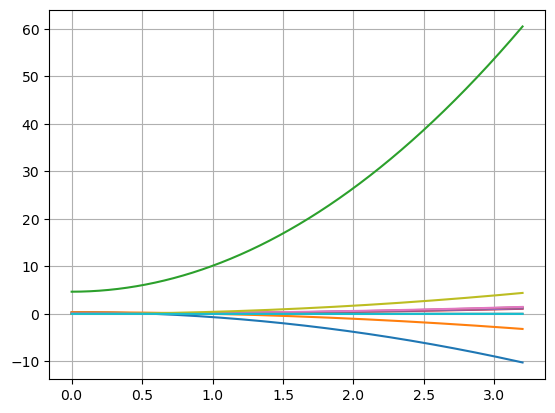

In [50]:
plt.plot(hy, mh_1(hy, 25/80))
plt.plot(hy, mG_1(hy, 25/80))
plt.plot(hy, mS_1(hy, 25/80))
plt.plot(hy, mwt_1(hy, 25/80))
plt.plot(hy, mwl_1(hy, 25/80))
plt.plot(hy, mzt_1(hy, 25/80))
plt.plot(hy, mzl_1(hy, 25/80))
plt.plot(hy, mphl_1(hy, 25/80))
plt.plot(hy, mt_1(hy, 25/80))
plt.plot(hy, mb_1(hy, 25/80))
plt.grid(True)
#plt.legend()

### Calling potential functions

#### With correct set of inputs

In [52]:
test_model1.cw_potential(hy,140,**{'scheme':"MS-Bar", 'scale':2.1595})

<tf.Tensor: shape=(3200, 1), dtype=float32, numpy=
array([[1.1265235],
       [1.1265235],
       [1.126524 ],
       ...,
       [1.9444337],
       [1.9461623],
       [1.9478958]], dtype=float32)>

In [54]:
test_model1.cw_potential_deriv(hy,100,**{'scale':2.1595, 'scheme':'MS-Bar'})

<tf.Tensor: shape=(3200, 1), dtype=float32, numpy=
array([[0.0000000e+00],
       [1.8784356e-04],
       [3.7568610e-04],
       ...,
       [8.6483860e-01],
       [8.6792421e-01],
       [8.7101805e-01]], dtype=float32)>

In [56]:
test_model1.cw_potential_deriv(hy,100,**{'scheme':'On-shell'})

<tf.Tensor: shape=(3200, 1), dtype=float32, numpy=
array([[0.0000000e+00],
       [2.0314114e+00],
       [4.0628214e+00],
       ...,
       [4.0142534e+03],
       [4.0156299e+03],
       [4.0170083e+03]], dtype=float32)>

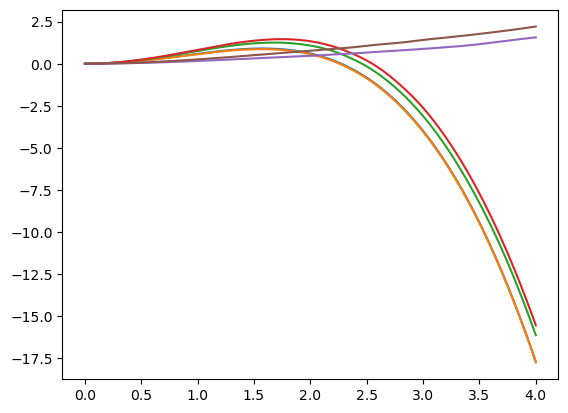

In [72]:
# plt.plot(hy, test_model1.cw_potential_deriv(hy,100,**{'scheme':'On-shell'}))
plt.plot(h2, test_model1.cw_potential(h2,100,**{'scheme':'On-shell'}) - test_model1.cw_potential(h20,100,**{'scheme':'On-shell'}))
plt.plot(h2, test_model1.cw_potential(h2,120,**{'scheme':'On-shell'}) - test_model1.cw_potential(h20,120,**{'scheme':'On-shell'}))

plt.plot(h2, test_model1.total_potential(h2,100,**{'scheme':'On-shell'}, large_T_approx=False) - test_model1.total_potential(h20,100,**{'scheme':'On-shell'}, large_T_approx=False))
plt.plot(h2, test_model1.total_potential(h2,120,**{'scheme':'On-shell'}, large_T_approx=False) - test_model1.total_potential(h20,120,**{'scheme':'On-shell'}, large_T_approx=False))

plt.plot(h2, test_model1.finite_T_potential(h2,100, large_T_approx=False) - test_model1.finite_T_potential(h20,100, large_T_approx=False))
plt.plot(h2, test_model1.finite_T_potential(h2,120, large_T_approx=False) - test_model1.finite_T_potential(h20,120, large_T_approx=False))
#plt.plot(hy, test_model1.cw_potential(hy,100,**{'scheme':"MS-Bar", 'scale':2.1595}) - test_model1.cw_potential(h0,100,**{'scheme':"MS-Bar", 'scale':2.1595}))

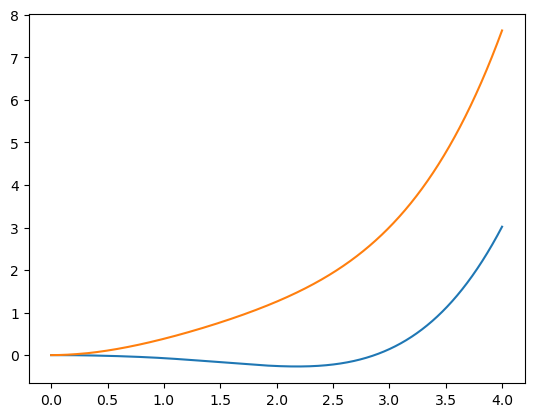

In [77]:
# plt.plot(hy, test_model1.cw_potential_deriv(hy,100,**{'scheme':'On-shell'}))
#plt.plot(h2, test_model2.cw_potential(h2,100,**{'scheme':'On-shell'}) - test_model2.cw_potential(h20,100,**{'scheme':'On-shell'}))
#plt.plot(h2, test_model2.cw_potential(h2,120,**{'scheme':'On-shell'}) - test_model2.cw_potential(h20,120,**{'scheme':'On-shell'}))

plt.plot(h2, test_model2.total_potential(h2,100,**{'scale':2.1595,'scheme':'MS-Bar'}, large_T_approx=True) - test_model2.total_potential(h20,100,**{'scale':2.1595,'scheme':'MS-Bar'}, large_T_approx=True))
plt.plot(h2, test_model2.total_potential(h2,120,**{'scale':2.1595,'scheme':'MS-Bar'}, large_T_approx=True) - test_model2.total_potential(h20,120,**{'scale':2.1595,'scheme':'MS-Bar'}, large_T_approx=True))

#plt.plot(h2, test_model2.finite_T_potential(h2,100, large_T_approx=False) - test_model2.finite_T_potential(h20,100, large_T_approx=False))
#plt.plot(h2, test_model2.finite_T_potential(h2,120, large_T_approx=False) - test_model2.finite_T_potential(h20,120, large_T_approx=False))
#plt.plot(hy, test_model1.cw_potential(hy,100,**{'scheme':"MS-Bar", 'scale':2.1595}) - test_model1.cw_potential(h0,100,**{'scheme':"MS-Bar", 'scale':2.1595}))

In [ ]:
test_model1.finite_T_potential(hy,100,False)-test_model1.finite_T_potential(h0,100,False)

<tf.Tensor: shape=(3200, 1), dtype=float32, numpy=
array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.97644997],
       [0.97696304],
       [0.9774761 ]], dtype=float32)>

#### Intentional mistake

In [53]:
test_model1.cw_potential(hy,90,**{'scheme':"mistake"})

Unknown renormalization scheme entered. Expected 'MS-Bar' or 'On-shell'


### Error expected due to incomlete function definitions - now sorted - due to no incomplete function definitions

### Plotting potential functions

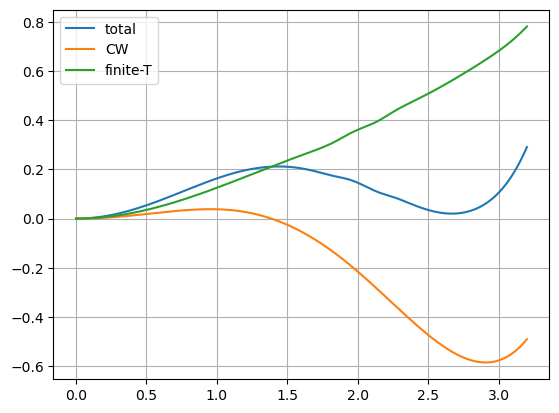

In [14]:
plt.plot(hy, (test_model1.total_potential(hy, 90, False, **{'scheme':"MS-Bar", 'scale':2.1595}) - test_model1.total_potential(h0, 90, False, **{'scheme':"MS-Bar", 'scale':2.1595})), label="total")
plt.plot(hy, (test_model1.cw_potential(hy, 90, **{'scheme':"MS-Bar", 'scale':2.1595}) - test_model1.cw_potential(h0, 90, **{'scheme':"MS-Bar", 'scale':2.1595})), label="CW" )
plt.plot(hy, (test_model1.finite_T_potential(hy, 90, False) - test_model1.finite_T_potential(h0, 90, False)), label="finite-T" )
plt.legend()
plt.grid(True)

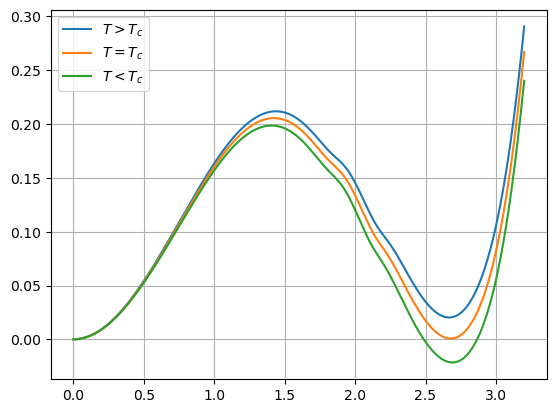

In [20]:
plt.plot(hy, (test_model1.total_potential(hy, 90, False, **{'scheme':"MS-Bar", 'scale':2.1595}) - test_model1.total_potential(h0, 90, False, **{'scheme':"MS-Bar", 'scale':2.1595})), label="$T>T_c$")
plt.plot(hy, (test_model1.total_potential(hy, 89.3, False, **{'scheme':"MS-Bar", 'scale':2.1595}) - test_model1.total_potential(h0, 89.3, False, **{'scheme':"MS-Bar", 'scale':2.1595})), label="$T=T_c$")
plt.plot(hy, (test_model1.total_potential(hy, 88.5, False, **{'scheme':"MS-Bar", 'scale':2.1595}) - test_model1.total_potential(h0, 88.5, False, **{'scheme':"MS-Bar", 'scale':2.1595})), label="$T<T_c$")
plt.legend()
plt.grid(True)